In [8]:
from tesserocr import PyTessBaseAPI, RIL

import PIL.Image as PImage

In [9]:
import numpy as np
from IPython.display import display, Image
from io import BytesIO

import math

In [10]:
def display_img(im):
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png', retina=True))

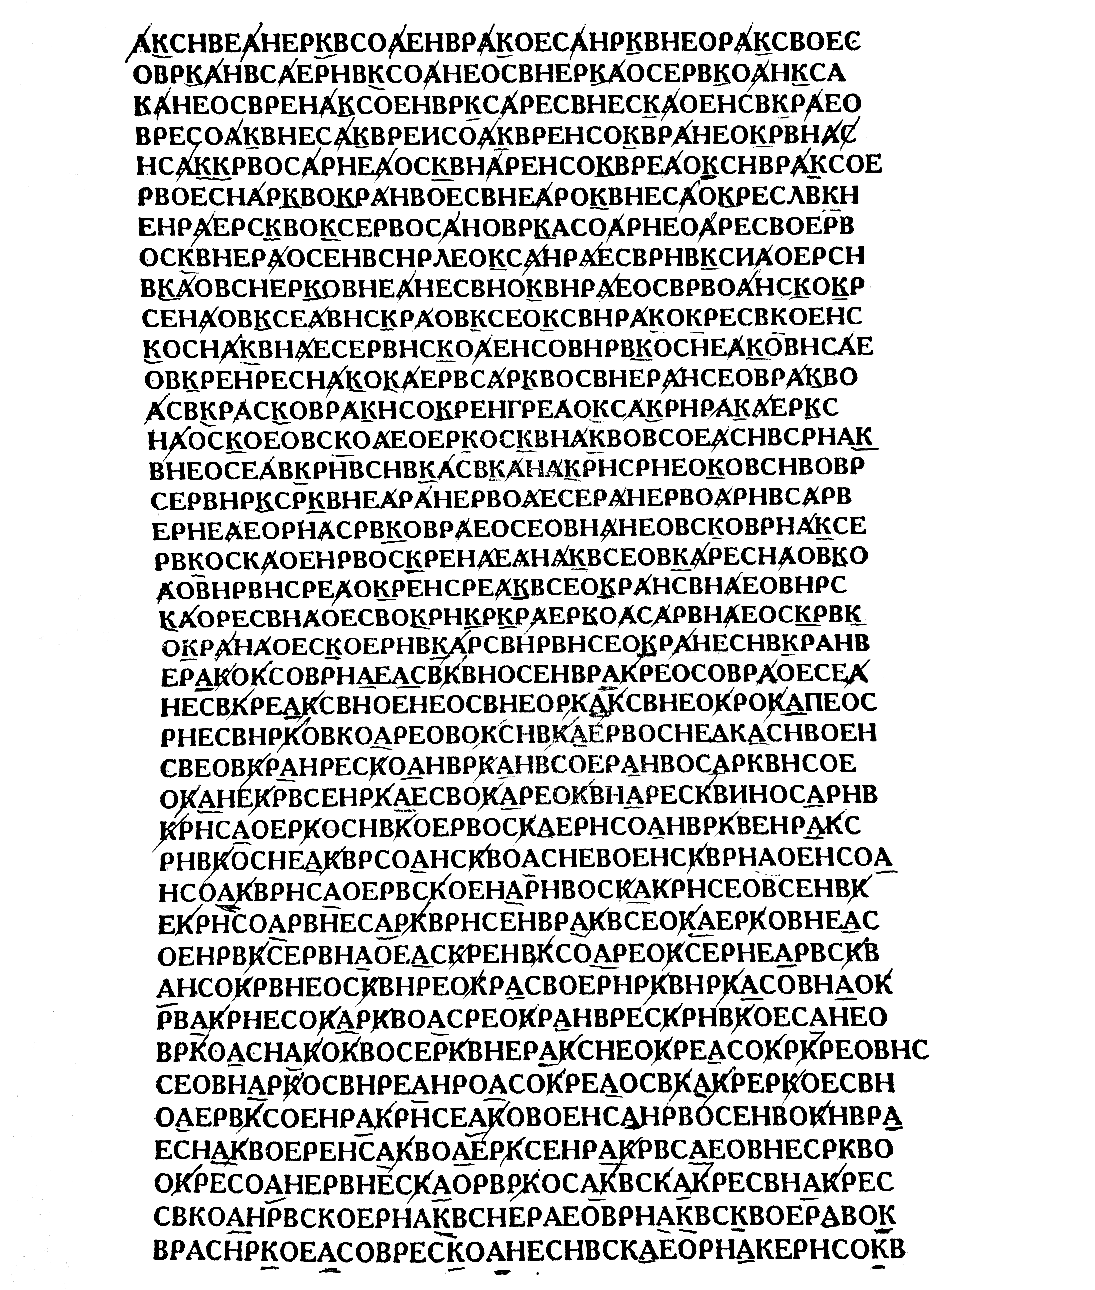

In [11]:
display_img(PImage.open('./res/table_real.jpg').convert('L'))

In [16]:
image = PImage.open('./res/table_real.jpg').convert('L')

api = PyTessBaseAPI(lang='rus')
api.SetImage(image)

height_bias = 1.5

letters = api.GetComponentImages(RIL.SYMBOL, True)
letters = [(b[0]) for b in letters]
mean_w, mean_h = letter_means(letters, height_bias)

print('Mean width: {}, mean height: {}'.format(mean_w, mean_h))

letters = filter_out_small_width(letters, mean_w)
letters = filter_out_small_height(letters, mean_h, height_bias=height_bias)

print('Found {} symbols'.format(len(letters)))

Mean width: 18.185434929197573, mean height: 30.266014834794337
Found 1472 symbols


In [15]:
def letter_means(letters, height_bias):
    widths = []
    heights = []

    for i, lt in enumerate(letters):
        widths.append(lt.width)
        heights.append(lt.height)
        
    return np.mean(widths), np.mean(heights) * height_bias

In [1]:
def shift_round(float_val, limit):
    lo = math.floor(float_val)
    hi = lo + 1
    diff = float_val - lo
    
    return lo if diff < limit else hi

In [2]:
def split_horizontal_by_mean(img, mean_h, round_offset=0.5):
    rows = shift_round(img.height / mean_h, round_offset)
    
    print('Height: {}'.format(img.height / mean_h))
    
    print('Before')
    display_img(img)

    # because it's better to avoid division by zero
    if rows == 0:
        return [img]
    
    row_h = img.height / rows
    rows_pics = []

    print('After')
    for r_id in range(0, rows):
        top = row_h * r_id
        bot = min(img.height, row_h * (r_id + 1))
        
        result_row = img.crop((0, top, img.width, bot))
        display_img(result_row)
        
        rows_pics.append(result_row)
        
    return rows_pics

In [3]:
def split_vertical_by_mean(img, mean_w, round_offset=0.7):
    cols = shift_round(img.width / mean_w, round_offset)

    print('width: {}'.format(img.width / mean_w))
    
    print('Before')
    display_img(img)
    
    # because it's better to avoid division by zero
    if cols == 0:
        return [img]
    
    col_w = img.width / cols
    letter_pics = []
    
    print('After')
    for c_id in range(0, cols):
        left = col_w * c_id
        right = min(img.width, col_w * (c_id + 1))
        
        result_letter = img.crop((left, 0, right, img.height))
        display_img(result_letter)
        
        letter_pics.append(result_letter)
        
    return letter_pics

In [4]:
def filter_out_small_width(letters, mean_w, min_scale=0.7):
    result = []
    
    for lt in letters:
        if lt.width / mean_w > min_scale:
            result.append(lt)
            
    return result

In [5]:
def filter_out_small_height(letters, mean_h, height_bias=1.5, min_scale=0.3):
    result = []
    
    for lt in letters:
        if (lt.height * height_bias) / mean_h > min_scale:
            result.append(lt)
            
    return result

In [6]:
def insert_list_at_index(to, which, index, with_exclude=False):
    return to[:index] + which + to[index + 1 if with_exclude is True else 0:]

In [7]:
def trim_whiteness_by_x(row_image):
    row_arr = np.array(row_image)
    
    white_col = 250
    trim_range = []
    
    for i in range(0, row_image.width):
        avg = np.average(row_arr[:, i])

        if avg > white_col and len(trim_range) == 0:
            continue

        if avg < white_col and len(trim_range) == 0:
            trim_range.append(i)
            continue

        if avg > white_col and len(trim_range) == 1:
            trim_range.append(i)
            break
            
    if len(trim_range) == 0:
        return row_image
    elif len(trim_range) == 1 and trim_range[0] >= row_image.width * 0.8:
        return row_image
    elif len(trim_range) == 1 and trim_range[0] < row_image.width * 0.8:
        return row_image.crop((trim_range[0], 0, row_image.width, row_image.height))
    
    left, right = trim_range[0], trim_range[1]
    
    return row_image.crop((left, 0, right, row_image.height))

index: 0


index: 1


index: 2


index: 3


index: 4


index: 5


index: 6


index: 7


index: 8


index: 9


index: 10


index: 11


index: 12


index: 13


index: 14


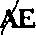

index: 15


index: 16


index: 17


index: 18


index: 19


index: 20


index: 21


index: 22


index: 23


index: 24


index: 25


index: 26


index: 27


index: 28


index: 29


index: 30


index: 31


index: 32


index: 33


index: 34


index: 35


index: 36


index: 37


index: 38


index: 39


index: 40


index: 41


index: 42


index: 43


index: 44


index: 45


index: 46


index: 47


index: 48


index: 49


index: 50


index: 51


index: 52


index: 53


index: 54


index: 55


index: 56


index: 57


index: 58


index: 59


index: 60


index: 61


index: 62


index: 63


index: 64


index: 65


index: 66


index: 67


index: 68


index: 69


index: 70


index: 71


index: 72


index: 73


index: 74


index: 75


index: 76


index: 77


index: 78


index: 79


index: 80


index: 81


index: 82


index: 83


index: 84


index: 85


index: 86


index: 87


index: 88


index: 89


index: 90


index: 91


index: 92


index: 93


index: 94


index: 95


index: 96


index: 97


index: 98


index: 99


index: 100


index: 101


index: 102


index: 103


index: 104


index: 105


index: 106


index: 107


index: 108


index: 109


index: 110


index: 111


index: 112


index: 113


index: 114


index: 115


index: 116


index: 117


index: 118


index: 119


index: 120


index: 121


index: 122


index: 123


index: 124


index: 125


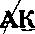

index: 126


index: 127


index: 128


index: 129


index: 130


index: 131


index: 132


index: 133


index: 134


index: 135


index: 136


index: 137


index: 138


index: 139


index: 140


index: 141


index: 142


index: 143


index: 144


index: 145


index: 146


index: 147


index: 148


index: 149


index: 150


index: 151


index: 152


index: 153


index: 154


index: 155


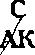

index: 156


index: 157


index: 158


index: 159


index: 160


index: 161


index: 162


index: 163


index: 164


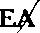

index: 165


index: 166


index: 167


index: 168


index: 169


index: 170


index: 171


index: 172


index: 173


index: 174


index: 175


index: 176


index: 177


index: 178


index: 179


index: 180


index: 181


index: 182


index: 183


index: 184


index: 185


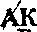

index: 186


index: 187


index: 188


index: 189


index: 190


index: 191


index: 192


index: 193


index: 194


index: 195


index: 196


index: 197


index: 198


index: 199


index: 200


index: 201


index: 202


index: 203


index: 204


index: 205


index: 206


index: 207


index: 208


index: 209


index: 210


index: 211


index: 212


index: 213


index: 214


index: 215


index: 216


index: 217


index: 218


index: 219


index: 220


index: 221


index: 222


index: 223


index: 224


index: 225


index: 226


index: 227


index: 228


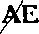

index: 229


index: 230


index: 231


index: 232


index: 233


index: 234


index: 235


index: 236


index: 237


index: 238


index: 239


index: 240


index: 241


index: 242


index: 243


index: 244


index: 245


index: 246


index: 247


index: 248


index: 249


index: 250


index: 251


index: 252


index: 253


index: 254


index: 255


index: 256


index: 257


index: 258


index: 259


index: 260


index: 261


index: 262


index: 263


index: 264


index: 265


index: 266


index: 267


index: 268


index: 269


index: 270


index: 271


index: 272


index: 273


index: 274


index: 275


index: 276


index: 277


index: 278


index: 279


index: 280


index: 281


index: 282


index: 283


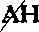

index: 284


index: 285


index: 286


index: 287


index: 288


index: 289


index: 290


index: 291


index: 292


index: 293


index: 294


index: 295


index: 296


index: 297


index: 298


index: 299


index: 300


index: 301


index: 302


index: 303


index: 304


index: 305


index: 306


index: 307


index: 308


index: 309


index: 310


index: 311


index: 312


index: 313


index: 314


index: 315


index: 316


index: 317


index: 318


index: 319


index: 320


index: 321


index: 322


index: 323


index: 324


index: 325


index: 326


index: 327


index: 328


index: 329


index: 330


index: 331


index: 332


index: 333


index: 334


index: 335


index: 336


index: 337


index: 338


index: 339


index: 340


index: 341


index: 342


index: 343


index: 344


index: 345


index: 346


index: 347


index: 348


index: 349


index: 350


index: 351


index: 352


index: 353


index: 354


index: 355


index: 356


index: 357


index: 358


index: 359


index: 360


index: 361


index: 362


index: 363


index: 364


index: 365


index: 366


index: 367


index: 368


index: 369


index: 370


index: 371


index: 372


index: 373


index: 374


index: 375


index: 376


index: 377


index: 378


index: 379


index: 380


index: 381


index: 382


index: 383


index: 384


index: 385


index: 386


index: 387


index: 388


index: 389


index: 390


index: 391


index: 392


index: 393


index: 394


index: 395


index: 396


index: 397


index: 398


index: 399


index: 400


index: 401


index: 402


index: 403


index: 404


index: 405


index: 406


index: 407


index: 408


index: 409


index: 410


index: 411


index: 412


index: 413


index: 414


index: 415


index: 416


index: 417


index: 418


index: 419


index: 420


index: 421


index: 422


index: 423


index: 424


index: 425


index: 426


index: 427


index: 428


index: 429


index: 430


index: 431


index: 432


index: 433


index: 434


index: 435


index: 436


index: 437


index: 438


index: 439


index: 440


index: 441


index: 442


index: 443


index: 444


index: 445


index: 446


index: 447


index: 448


index: 449


index: 450


index: 451


index: 452


index: 453


index: 454


index: 455


index: 456


index: 457


index: 458


index: 459


index: 460


index: 461


index: 462


index: 463


index: 464


index: 465


index: 466


index: 467


index: 468


index: 469


index: 470


index: 471


index: 472


index: 473


index: 474


index: 475


index: 476


index: 477


index: 478


index: 479


index: 480


index: 481


index: 482


index: 483


index: 484


index: 485


index: 486


index: 487


index: 488


index: 489


index: 490


index: 491


index: 492


index: 493


index: 494


index: 495


index: 496


index: 497


index: 498


index: 499


index: 500


index: 501


index: 502


index: 503


index: 504


index: 505


index: 506


index: 507


index: 508


index: 509


index: 510


index: 511


index: 512


index: 513


index: 514


index: 515


index: 516


index: 517


index: 518


index: 519


index: 520


index: 521


index: 522


index: 523


index: 524


index: 525


index: 526


index: 527


index: 528


index: 529


index: 530


index: 531


index: 532


index: 533


index: 534


index: 535


index: 536


index: 537


index: 538


index: 539


index: 540


index: 541


index: 542


index: 543


index: 544


index: 545


index: 546


index: 547


index: 548


index: 549


index: 550


index: 551


index: 552


index: 553


index: 554


index: 555


index: 556


index: 557


index: 558


index: 559


index: 560


index: 561


index: 562


index: 563


index: 564


index: 565


index: 566


index: 567


index: 568


index: 569


index: 570


index: 571


index: 572


index: 573


index: 574


index: 575


index: 576


index: 577


index: 578


index: 579


index: 580


index: 581


index: 582


index: 583


index: 584


index: 585


index: 586


index: 587


index: 588


index: 589


index: 590


index: 591


index: 592


index: 593


index: 594


index: 595


index: 596


index: 597


index: 598


index: 599


index: 600


index: 601


index: 602


index: 603


index: 604


index: 605


index: 606


index: 607


index: 608


index: 609


index: 610


index: 611


index: 612


index: 613


index: 614


index: 615


index: 616


index: 617


index: 618


index: 619


index: 620


index: 621


index: 622


index: 623


index: 624


index: 625


index: 626


index: 627


index: 628


index: 629


index: 630


index: 631


index: 632


index: 633


index: 634


index: 635


index: 636


index: 637


index: 638


index: 639


index: 640


index: 641


index: 642


index: 643


index: 644


index: 645


index: 646


index: 647


index: 648


index: 649


index: 650


index: 651


index: 652


index: 653


index: 654


index: 655


index: 656


index: 657


index: 658


index: 659


index: 660


index: 661


index: 662


index: 663


index: 664


index: 665


index: 666


index: 667


index: 668


index: 669


index: 670


index: 671


index: 672


index: 673


index: 674


index: 675


index: 676


index: 677


index: 678


index: 679


index: 680


index: 681


index: 682


index: 683


index: 684


index: 685


index: 686


index: 687


index: 688


index: 689


index: 690


index: 691


index: 692


index: 693


index: 694


index: 695


index: 696


index: 697


index: 698


index: 699


index: 700


index: 701


index: 702


index: 703


index: 704


index: 705


index: 706


index: 707


index: 708


index: 709


index: 710


index: 711


index: 712


index: 713


index: 714


index: 715


index: 716


index: 717


index: 718


index: 719


index: 720


index: 721


index: 722


index: 723


index: 724


index: 725


index: 726


index: 727


index: 728


index: 729


index: 730


index: 731


index: 732


index: 733


index: 734


index: 735


index: 736


index: 737


index: 738


index: 739


index: 740


index: 741


index: 742


index: 743


index: 744


index: 745


index: 746


index: 747


index: 748


index: 749


index: 750


index: 751


index: 752


index: 753


index: 754


index: 755


index: 756


index: 757


index: 758


index: 759


index: 760


index: 761


index: 762


index: 763


index: 764


index: 765


index: 766


index: 767


index: 768


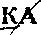

index: 769


index: 770


index: 771


index: 772


index: 773


index: 774


index: 775


index: 776


index: 777


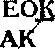

index: 778


index: 779


index: 780


index: 781


index: 782


index: 783


index: 784


index: 785


index: 786


index: 787


index: 788


index: 789


index: 790


index: 791


index: 792


index: 793


index: 794


index: 795


index: 796


index: 797


index: 798


index: 799


index: 800


index: 801


index: 802


index: 803


index: 804


index: 805


index: 806


index: 807


index: 808


index: 809


index: 810


index: 811


index: 812


index: 813


index: 814


index: 815


index: 816


index: 817


index: 818


index: 819


index: 820


index: 821


index: 822


index: 823


index: 824


index: 825


index: 826


index: 827


index: 828


index: 829


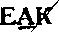

index: 830


index: 831


index: 832


index: 833


index: 834


index: 835


index: 836


index: 837


index: 838


index: 839


index: 840


index: 841


index: 842


index: 843


index: 844


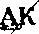

index: 845


index: 846


index: 847


index: 848


index: 849


index: 850


index: 851


index: 852


index: 853


index: 854


index: 855


index: 856


index: 857


index: 858


index: 859


index: 860


index: 861


index: 862


index: 863


index: 864


index: 865


index: 866


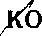

index: 867


index: 868


index: 869


index: 870


index: 871


index: 872


index: 873


index: 874


index: 875


index: 876


index: 877


index: 878


index: 879


index: 880


index: 881


index: 882


index: 883


index: 884


index: 885


index: 886


index: 887


index: 888


index: 889


index: 890


index: 891


index: 892


index: 893


index: 894


index: 895


index: 896


index: 897


index: 898


index: 899


index: 900


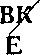

index: 901


index: 902


index: 903


index: 904


index: 905


index: 906


index: 907


index: 908


index: 909


index: 910


index: 911


index: 912


index: 913


index: 914


index: 915


index: 916


index: 917


index: 918


index: 919


index: 920


index: 921


index: 922


index: 923


index: 924


index: 925


index: 926


index: 927


index: 928


index: 929


index: 930


index: 931


index: 932


index: 933


index: 934


index: 935


index: 936


index: 937


index: 938


index: 939


index: 940


index: 941


index: 942


index: 943


index: 944


index: 945


index: 946


index: 947


index: 948


index: 949


index: 950


index: 951


index: 952


index: 953


index: 954


index: 955


index: 956


index: 957


index: 958


index: 959


index: 960


index: 961


index: 962


index: 963


index: 964


index: 965


index: 966


index: 967


index: 968


index: 969


index: 970


index: 971


index: 972


index: 973


index: 974


index: 975


index: 976


index: 977


index: 978


index: 979


index: 980


index: 981


index: 982


index: 983


index: 984


index: 985


index: 986


index: 987


index: 988


index: 989


index: 990


index: 991


index: 992


index: 993


index: 994


index: 995


index: 996


index: 997


index: 998


index: 999


index: 1000


index: 1001


index: 1002


index: 1003


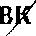

index: 1004


index: 1005


index: 1006


index: 1007


index: 1008


index: 1009


index: 1010


index: 1011


index: 1012


index: 1013


index: 1014


index: 1015


index: 1016


index: 1017


index: 1018


index: 1019


index: 1020


index: 1021


index: 1022


index: 1023


index: 1024


index: 1025


index: 1026


index: 1027


index: 1028


index: 1029


index: 1030


index: 1031


index: 1032


index: 1033


index: 1034


index: 1035


index: 1036


index: 1037


index: 1038


index: 1039


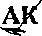

index: 1040


index: 1041


index: 1042


index: 1043


index: 1044


index: 1045


index: 1046


index: 1047


index: 1048


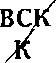

index: 1049


index: 1050


index: 1051


index: 1052


index: 1053


index: 1054


index: 1055


index: 1056


index: 1057


index: 1058


index: 1059


index: 1060


index: 1061


index: 1062


index: 1063


index: 1064


index: 1065


index: 1066


index: 1067


index: 1068


index: 1069


index: 1070


index: 1071


index: 1072


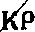

index: 1073


index: 1074


index: 1075


index: 1076


index: 1077


index: 1078


index: 1079


index: 1080


index: 1081


index: 1082


index: 1083


index: 1084


index: 1085


index: 1086


index: 1087


index: 1088


index: 1089


index: 1090


index: 1091


index: 1092


index: 1093


index: 1094


index: 1095


index: 1096


index: 1097


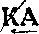

index: 1098


index: 1099


index: 1100


index: 1101


index: 1102


index: 1103


index: 1104


index: 1105


index: 1106


index: 1107


index: 1108


index: 1109


index: 1110


index: 1111


index: 1112


index: 1113


index: 1114


index: 1115


index: 1116


index: 1117


index: 1118


index: 1119


index: 1120


index: 1121


index: 1122


index: 1123


index: 1124


index: 1125


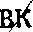

index: 1126


index: 1127


index: 1128


index: 1129


index: 1130


index: 1131


index: 1132


index: 1133


index: 1134


index: 1135


index: 1136


index: 1137


index: 1138


index: 1139


index: 1140


index: 1141


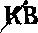

index: 1142


index: 1143


index: 1144


index: 1145


index: 1146


index: 1147


index: 1148


index: 1149


index: 1150


index: 1151


index: 1152


index: 1153


index: 1154


index: 1155


index: 1156


index: 1157


index: 1158


index: 1159


index: 1160


index: 1161


index: 1162


index: 1163


index: 1164


index: 1165


index: 1166


index: 1167


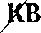

index: 1168


index: 1169


index: 1170


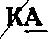

index: 1171


index: 1172


index: 1173


index: 1174


index: 1175


index: 1176


index: 1177


index: 1178


index: 1179


index: 1180


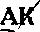

index: 1181


index: 1182


index: 1183


index: 1184


index: 1185


index: 1186


index: 1187


index: 1188


index: 1189


index: 1190


index: 1191


index: 1192


index: 1193


index: 1194


index: 1195


index: 1196


index: 1197


index: 1198


index: 1199


index: 1200


index: 1201


index: 1202


index: 1203


index: 1204


index: 1205


index: 1206


index: 1207


index: 1208


index: 1209


index: 1210


index: 1211


index: 1212


index: 1213


index: 1214


index: 1215


index: 1216


index: 1217


index: 1218


index: 1219


index: 1220


index: 1221


index: 1222


index: 1223


index: 1224


index: 1225


index: 1226


index: 1227


index: 1228


index: 1229


index: 1230


index: 1231


index: 1232


index: 1233


index: 1234


index: 1235


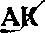

index: 1236


index: 1237


index: 1238


index: 1239


index: 1240


index: 1241


index: 1242


index: 1243


index: 1244


index: 1245


index: 1246


index: 1247


index: 1248


index: 1249


index: 1250


index: 1251


index: 1252


index: 1253


index: 1254


index: 1255


index: 1256


index: 1257


index: 1258


index: 1259


index: 1260


index: 1261


index: 1262


index: 1263


index: 1264


index: 1265


index: 1266


index: 1267


index: 1268


index: 1269


index: 1270


index: 1271


index: 1272


index: 1273


index: 1274


index: 1275


index: 1276


index: 1277


index: 1278


index: 1279


index: 1280


index: 1281


index: 1282


index: 1283


index: 1284


index: 1285


index: 1286


index: 1287


index: 1288


index: 1289


index: 1290


index: 1291


index: 1292


index: 1293


index: 1294


index: 1295


index: 1296


index: 1297


index: 1298


index: 1299


index: 1300


index: 1301


index: 1302


index: 1303


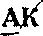

index: 1304


index: 1305


index: 1306


index: 1307


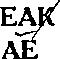

index: 1308


index: 1309


index: 1310


index: 1311


index: 1312


index: 1313


index: 1314


index: 1315


index: 1316


index: 1317


index: 1318


index: 1319


index: 1320


index: 1321


index: 1322


index: 1323


index: 1324


index: 1325


index: 1326


index: 1327


index: 1328


index: 1329


index: 1330


index: 1331


index: 1332


index: 1333


index: 1334


index: 1335


index: 1336


index: 1337


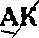

index: 1338


index: 1339


index: 1340


index: 1341


index: 1342


index: 1343


index: 1344


index: 1345


index: 1346


index: 1347


index: 1348


index: 1349


index: 1350


index: 1351


index: 1352


index: 1353


index: 1354


index: 1355


index: 1356


index: 1357


index: 1358


index: 1359


index: 1360


index: 1361


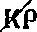

index: 1362


index: 1363


index: 1364


index: 1365


index: 1366


index: 1367


index: 1368


index: 1369


index: 1370


index: 1371


index: 1372


index: 1373


index: 1374


index: 1375


index: 1376


index: 1377


index: 1378


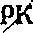

index: 1379


index: 1380


index: 1381


index: 1382


index: 1383


index: 1384


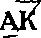

index: 1385


index: 1386


index: 1387


index: 1388


index: 1389


index: 1390


index: 1391


index: 1392


index: 1393


index: 1394


index: 1395


index: 1396


index: 1397


index: 1398


index: 1399


index: 1400


index: 1401


index: 1402


index: 1403


index: 1404


index: 1405


index: 1406


index: 1407


index: 1408


index: 1409


index: 1410


index: 1411


index: 1412


index: 1413


index: 1414


index: 1415


index: 1416


index: 1417


index: 1418


index: 1419


index: 1420


index: 1421


index: 1422


index: 1423


index: 1424


index: 1425


index: 1426


index: 1427


index: 1428


index: 1429


index: 1430


index: 1431


index: 1432


index: 1433


index: 1434


index: 1435


index: 1436


index: 1437


index: 1438


index: 1439


index: 1440


index: 1441


index: 1442


index: 1443


index: 1444


index: 1445


index: 1446


index: 1447


index: 1448


index: 1449


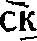

index: 1450


index: 1451


index: 1452


index: 1453


index: 1454


index: 1455


index: 1456


index: 1457


index: 1458


index: 1459


index: 1460


index: 1461


index: 1462


index: 1463


index: 1464


index: 1465


index: 1466


index: 1467


index: 1468


index: 1469


index: 1470


index: 1471


In [21]:
line = []
all_lines = []

# index_of_test_letter = 155

for i, lt in enumerate(letters):
    print('index: {}'.format(i))
    display_img(lt)
    
    line.append(lt)
    
    if (i + 1) % 40 == 0 or i == len(letters) - 1:
        all_lines.append(line)
        line = []

In [13]:
def norm_letters_by_h(lines, mean_h):
    letter_mtx = [l for l in lines]

    for i, line in enumerate(lines):
        for j, letter in enumerate(line):
            if letter.height > mean_h:
                rows = split_horizontal_by_mean(letter, mean_h)

                if len(rows) > 1:
                    for r_id, letter_row in enumerate(rows):
                        line_index = i + r_id
                        exclude = r_id == 0
                        
                        letter_mtx[line_index] = insert_list_at_index(lines[line_index], [letter_row], j, exclude)
                        
    return letter_mtx

In [23]:
def norm_letters_by_w(lines, mean_w):
    letter_mtx = [l for l in lines]

    for i, line in enumerate(lines):
        shift = 0
        line_modif = line
        
        for j, letter in enumerate(line):
            shifted = j + shift
            
            if letter.width > mean_w:
                trimmed = trim_whiteness_by_x(row_image=letter)
                letters = split_vertical_by_mean(trimmed, mean_w)

                if len(letters) > 1:
                    print('Letters after split are {}'.format(len(letters)))
                    line_modif = insert_list_at_index(line_modif, letters, shifted, True)
                    shift += (len(letters) - 1)
                elif len(letters) == 1:
                    line_modif[shifted] = trimmed
                    
        letter_mtx[i] = line_modif
                        
    return letter_mtx

Height: 1.222493288328933
Before


After


Height: 1.3216143657610087
Before


After


Height: 1.1564125700408827
Before


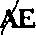

After


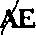

Height: 1.057291492608807
Before


After


Height: 1.1233722108968573
Before


After


Height: 1.057291492608807
Before


After


Height: 1.0903318517528322
Before


After


Height: 1.057291492608807
Before


After


Height: 1.1233722108968573
Before


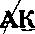

After


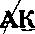

Height: 1.1564125700408827
Before


After


Height: 1.8172197529213872
Before


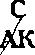

After


Height: 1.0242511334647817
Before


After


Height: 1.0903318517528322
Before


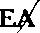

After


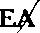

Height: 1.057291492608807
Before


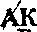

After


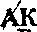

Height: 1.0903318517528322
Before


After


Height: 1.1233722108968573
Before


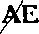

After


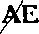

Height: 1.0903318517528322
Before


After


Height: 1.057291492608807
Before


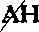

After


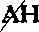

Height: 1.0903318517528322
Before


After


Height: 1.057291492608807
Before


After


Height: 1.1564125700408827
Before


After


Height: 1.1564125700408827
Before


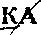

After


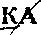

Height: 1.6189775980572356
Before


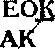

After


Height: 1.0242511334647817
Before


After


Height: 1.1233722108968573
Before


After


Height: 1.057291492608807
Before


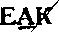

After


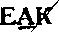

Height: 1.1233722108968573
Before


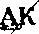

After


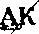

Height: 1.1233722108968573
Before


After


Height: 1.1894529291849079
Before


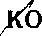

After


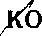

Height: 1.8172197529213872
Before


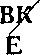

After


Height: 1.0903318517528322
Before


After


Height: 1.0242511334647817
Before


After


Height: 1.1894529291849079
Before


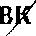

After


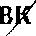

Height: 1.057291492608807
Before


After


Height: 1.1894529291849079
Before


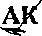

After


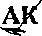

Height: 2.0815426260735888
Before


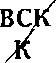

After


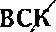

Height: 1.057291492608807
Before


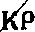

After


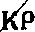

Height: 1.1233722108968573
Before


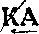

After


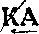

Height: 1.1233722108968573
Before


After


Height: 1.057291492608807
Before


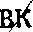

After


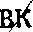

Height: 1.0903318517528322
Before


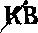

After


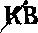

Height: 1.0903318517528322
Before


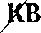

After


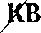

Height: 1.2885740066169835
Before


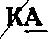

After


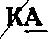

Height: 1.057291492608807
Before


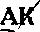

After


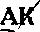

Height: 1.0903318517528322
Before


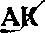

After


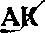

Height: 1.1233722108968573
Before


After


Height: 1.1233722108968573
Before


After


Height: 1.057291492608807
Before


After


Height: 1.1894529291849079
Before


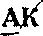

After


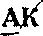

Height: 1.949381189497488
Before


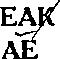

After


Height: 1.2555336474729584
Before


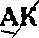

After


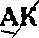

Height: 1.057291492608807
Before


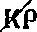

After


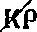

Height: 1.1233722108968573
Before


After


Height: 1.0903318517528322
Before


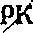

After


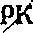

Height: 1.2555336474729584
Before


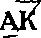

After


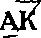

Height: 1.0242511334647817
Before


After


Height: 1.354654724905034
Before


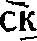

After


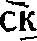

width: 1.4297155993918944
Before


After


width: 1.1547702918165301
Before


After


width: 1.2647484148466759
Before


After


width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.979606214542623
Before


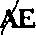

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.1995624606029143
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.2647484148466759
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.92461715302755
Before


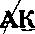

After


Letters after split are 2
width: 1.1547702918165301
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 0.8248359227260929
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.1995624606029143
Before


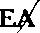

After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.0345952760576957
Before


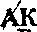

After


Letters after split are 2
width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.1995624606029143
Before


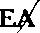

After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.0345952760576957
Before


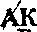

After


Letters after split are 2
width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.2647484148466759
Before


After


width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.8146390299974045
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


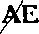

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.2647484148466759
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


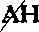

After


Letters after split are 2
width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.0997812303014571
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 2.859431198783789
Before


After


Letters after split are 3
width: 1.4297155993918944
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 2.1995624606029143
Before


After


Letters after split are 2
width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.5396937224220402
Before


After


width: 1.0997812303014571
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.5396937224220402
Before


After


width: 1.0997812303014571
Before


After


width: 1.3747265378768214
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 2.749453075753643
Before


After


Letters after split are 3
width: 1.979606214542623
Before


After


Letters after split are 2
width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.4297155993918944
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.8696280915124772
Before


After


Letters after split are 2
width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.7596499684823315
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.1547702918165301
Before


After


width: 1.2647484148466759
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.7596499684823315
Before


After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 2.2545515221179873
Before


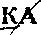

After


Letters after split are 2
width: 0.8798249842411657
Before


After


width: 2.3095405836330603
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.209759353331603
Before


After


width: 3.8492343060551
Before


After


Letters after split are 4
width: 1.4847046609069672
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 3.8492343060551
Before


After


Letters after split are 4
width: 1.4847046609069672
Before


After


width: 1.209759353331603
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.4847046609069672
Before


After


width: 3.244354629389299
Before


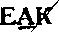

After


Letters after split are 3
width: 1.8696280915124772
Before


After


Letters after split are 2
width: 2.1445733990878417
Before


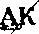

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.3197374763617487
Before


After


width: 1.4297155993918944
Before


After


width: 2.3095405836330603
Before


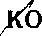

After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.8696280915124772
Before


After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 0.7698468612110201
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.3747265378768214
Before


After


width: 1.1547702918165301
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.4847046609069672
Before


After


width: 1.4297155993918944
Before


After


width: 1.5396937224220402
Before


After


width: 0.9348140457562386
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.4847046609069672
Before


After


width: 1.4297155993918944
Before


After


width: 1.5396937224220402
Before


After


width: 1.3197374763617487
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 2.364529645148133
Before


After


Letters after split are 2
width: 1.8146390299974045
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.2647484148466759
Before


After


width: 2.2545515221179873
Before


After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 2.3095405836330603
Before


After


Letters after split are 2
width: 1.979606214542623
Before


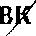

After


Letters after split are 2
width: 3.7392561830249544
Before


After


Letters after split are 4
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.7596499684823315
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.0447921687863844
Before


After


width: 2.3095405836330603
Before


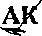

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 0.7698468612110201
Before


After


width: 1.0997812303014571
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.3747265378768214
Before


After


width: 1.92461715302755
Before


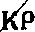

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.0447921687863844
Before


After


width: 1.4847046609069672
Before


After


width: 1.3197374763617487
Before


After


width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 2.1445733990878417
Before


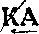

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.92461715302755
Before


After


Letters after split are 2
width: 1.4297155993918944
Before


After


width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.8146390299974045
Before


After


Letters after split are 2
width: 1.8146390299974045
Before


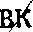

After


Letters after split are 2
width: 1.6496718454521857
Before


After


width: 1.2647484148466759
Before


After


width: 1.0447921687863844
Before


After


width: 2.1995624606029143
Before


After


Letters after split are 2
width: 2.0895843375727687
Before


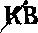

After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.1547702918165301
Before


After


width: 1.1547702918165301
Before


After


width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 2.2545515221179873
Before


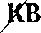

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 2.6394749527234973
Before


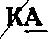

After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 2.1995624606029143
Before


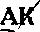

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.3197374763617487
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.2647484148466759
Before


After


width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 2.0895843375727687
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.8146390299974045
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 2.4745077681782788
Before


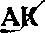

After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.594682783937113
Before


After


width: 1.0447921687863844
Before


After


width: 1.0997812303014571
Before


After


width: 1.1547702918165301
Before


After


width: 1.1547702918165301
Before


After


width: 1.0447921687863844
Before


After


width: 1.979606214542623
Before


After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 1.0997812303014571
Before


After


width: 1.2647484148466759
Before


After


width: 1.2647484148466759
Before


After


width: 1.3197374763617487
Before


After


width: 1.0997812303014571
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.4297155993918944
Before


After


width: 1.0447921687863844
Before


After


width: 2.364529645148133
Before


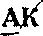

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 0.9348140457562386
Before


After


width: 1.0997812303014571
Before


After


width: 2.1995624606029143
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.1547702918165301
Before


After


width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 2.1445733990878417
Before


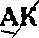

After


Letters after split are 2
width: 1.4297155993918944
Before


After


width: 1.0997812303014571
Before


After


width: 2.0345952760576957
Before


After


Letters after split are 2
width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.1547702918165301
Before


After


width: 1.0447921687863844
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 2.1445733990878417
Before


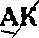

After


Letters after split are 2
width: 1.4297155993918944
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.0345952760576957
Before


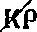

After


Letters after split are 2
width: 1.209759353331603
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.4847046609069672
Before


After


width: 1.0997812303014571
Before


After


width: 1.8146390299974045
Before


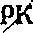

After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 2.2545515221179873
Before


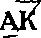

After


Letters after split are 2
width: 1.0447921687863844
Before


After


width: 1.209759353331603
Before


After


width: 1.4297155993918944
Before


After


width: 1.4297155993918944
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 2.0345952760576957
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 1.0997812303014571
Before


After


width: 1.209759353331603
Before


After


width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.3197374763617487
Before


After


width: 2.0345952760576957
Before


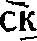

After


Letters after split are 2
width: 1.0997812303014571
Before


After


width: 1.0447921687863844
Before


After


width: 1.0447921687863844
Before


After


width: 1.1547702918165301
Before


After


width: 2.1445733990878417
Before


After


Letters after split are 2
width: 1.0997812303014571
Before


After


Row 1, length 41
Row 2, length 42
Row 3, length 41
Row 4, length 42
Row 5, length 88
Row 6, length 43
Row 7, length 42
Row 8, length 43
Row 9, length 42
Row 10, length 41
Row 11, length 42
Row 12, length 44
Row 13, length 45
Row 14, length 40
Row 15, length 44
Row 16, length 41
Row 17, length 43
Row 18, length 40
Row 19, length 42
Row 20, length 42
Row 21, length 68
Row 22, length 43
Row 23, length 42
Row 24, length 64
Row 25, length 42
Row 26, length 46
Row 27, length 42
Row 28, length 52
Row 29, length 46
Row 30, length 44
Row 31, length 43
Row 32, length 41
Row 33, length 42
Row 34, length 75
Row 35, length 43
Row 36, length 41
Row 37, length 34


In [26]:
l_mtx = norm_letters_by_h(all_lines, mean_h)
l_mtx = norm_letters_by_w(l_mtx, mean_w)
        
for i, line in enumerate(l_mtx):
    print('Row {}, length {}'.format(i + 1, len(line)))
    
#     for j, pic in enumerate(line):
#         display_img(pic)

In [70]:
a = [1, 2, 3, 45, 6]
b = [4, 5]

a[:3] + b + a[4:]

[1, 2, 3, 4, 5, 6]